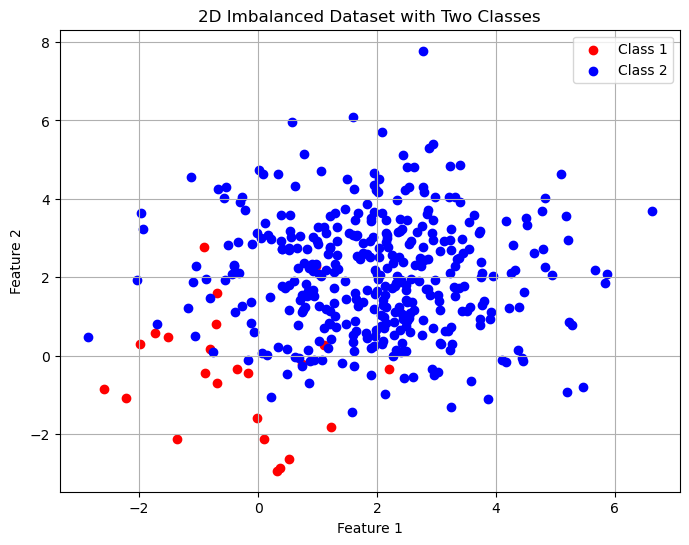

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Set random seed for reproductivity
np.random.seed(42)

# Generate imabalanced datasets 
n_samples_1 = 25
n_samples_2 = 375
centers = [(0, 0), (2, 2)]
cluster_std = [1.5, 1.5]

X, y = make_blobs(n_samples=[n_samples_1, n_samples_2], centers=centers, cluster_std=cluster_std, random_state=42)

# plotting 
plt.figure(figsize=(8,6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 1')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.98      0.98      0.98       113

    accuracy                           0.97       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.97      0.97      0.97       120

ROC AUC Score:  0.9292035398230089


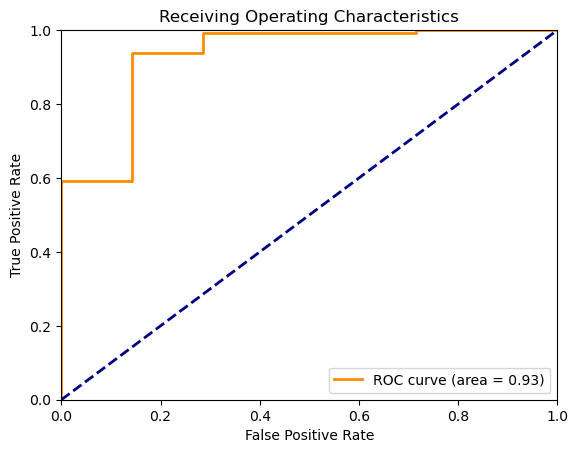

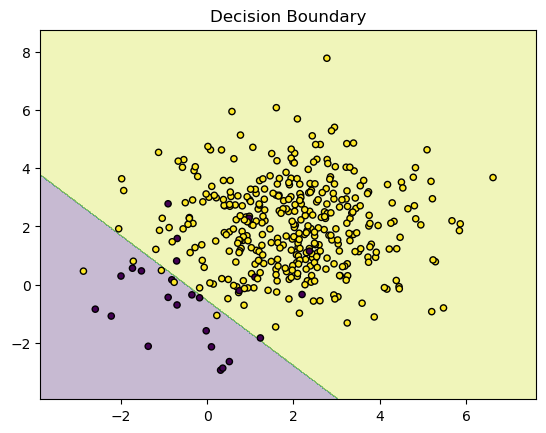

In [6]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:, 1]

print("Classification Report: ")
print(classification_report(y_test, y_pred))

print("ROC AUC Score: ", roc_auc_score(y_test, y_proba))

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiving Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

def plot_decision_boundaries(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundaries(X, y, classifier)

### Random Undersampling

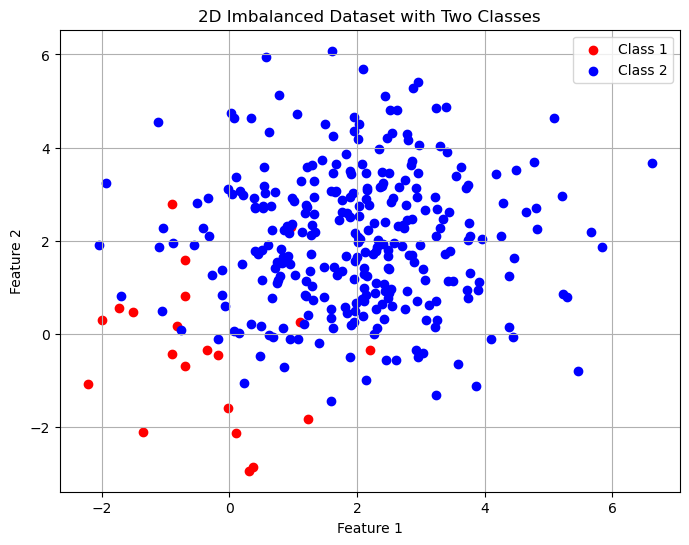

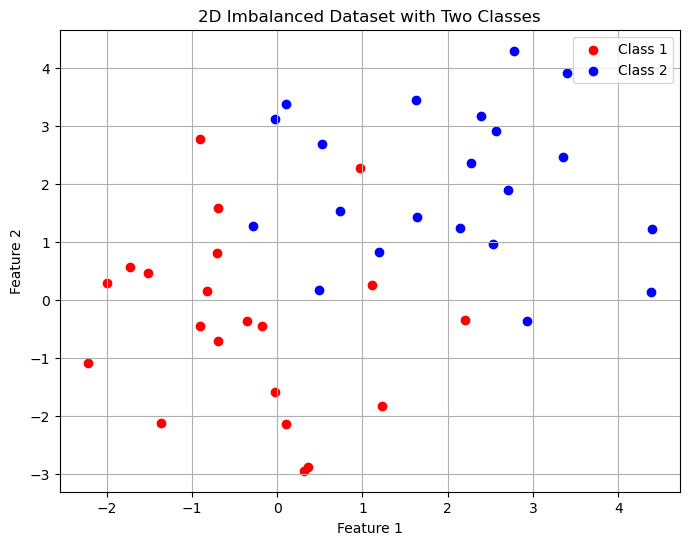

In [8]:
from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
X_train.shape

(320, 2)

In [10]:
X_resampled.shape

(42, 2)

In [11]:
import pandas as pd

pd.Series(y_train).value_counts()

1    299
0     21
Name: count, dtype: int64